# Diabetes Classification

In [16]:
from pathlib import Path

import pandas as pd


def load_dataset(part_dir):
    dataset_parts_df = [pd.read_csv(Path(part_dir) / f"part{part_num}.csv") for part_num in range(1, 6)]
    return pd.concat(dataset_parts_df)


dataset = load_dataset("data")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  500000 non-null  int64  
 1   ID          500000 non-null  int64  
 2   DIABETE3    499995 non-null  float64
 3   _RFHYPE5    500000 non-null  int64  
 4   TOLDHI2     433630 non-null  float64
 5   _CHOLCHK    500000 non-null  int64  
 6   _BMI5       457835 non-null  float64
 7   SMOKE100    480420 non-null  float64
 8   CVDSTRK3    500000 non-null  int64  
 9   _MICHD      495475 non-null  float64
 10  _TOTINDA    500000 non-null  int64  
 11  _FRTLT1     500000 non-null  int64  
 12  _VEGLT1     500000 non-null  int64  
 13  _RFDRHV5    500000 non-null  int64  
 14  HLTHPLN1    500000 non-null  int64  
 15  MEDCOST     500000 non-null  int64  
 16  GENHLTH     499995 non-null  float64
 17  MENTHLTH    500000 non-null  int64  
 18  PHYSHLTH    500000 non-null  int64  
 19  DIFFWALK

In [17]:
rename_map = {
    "DIABETE3": "diabetes",
    "_RFHYPE5": "high_blood_pressure",
    "TOLDHI2": "high_cholesterol",
    "_CHOLCHK": "cholesterol_check",
    "_BMI5": "bmi",
    "SMOKE100": "smoked_100_cigarettes",
    "CVDSTRK3": "stroke",
    "_MICHD": "coronary_disease",
    "_TOTINDA": "exercise",
    "_FRTLT1": "consumes_fruit",
    "_VEGLT1": "consumes_vegetable",
    "HLTHPLN1": "insurance",
    "MEDCOST": "no_doctor_money",
    "GENHLTH": "health",
    "MENTHLTH": "mental_health",
    "PHYSHLTH": "physical_health",
    "DIFFWALK": "climb_difficulty",
    "SEX": "sex",
    "_AGEG5YR": "age_category",
    "EDUCA": "education_level",
    "INCOME2": "income"
}

dataset.rename(columns=rename_map, inplace=True)
from categories import *

# Create a dictionary mapping column names to their corresponding Enum classes
enum_mapping = {
    "diabetes": Diabetes,
    "high_blood_pressure": HighBloodPressure,
    "high_cholesterol": BloodCholesterolHigh,
    "cholesterol_check": CholesterolChecked,
    "smoked_100_cigarettes": SmokedAtLeast100Cigarettes,
    "stroke": EverDiagnosedWithStroke,
    "coronary_disease": EverHadCHDorMI,
    "exercise": LeisureTimePhysicalActivity,
    "consumes_fruit": ConsumeFruitFrequency,
    "consumes_vegetable": ConsumeVegetablesFrequency,
    "insurance": HealthCareCoverage,
    "no_doctor_money": CouldNotSeeDoctorBecauseOfCost,
    "health": GeneralHealth,
    "climb_difficulty": DifficultyWalkingOrClimbingStairs,
    "sex": RespondentSex,
    "age_category": AgeFiveYearCategories,
    "education_level": EducationLevel,
    "income": IncomeLevel,
}


def to_category_value(val):
    """ Convert numerical values to string representations from the corresponding Enum classes """

    convert_to_nan = {"REFUSED", "Blank", "DONT_KNOW_OR_NOT_SURE", "DONT_KNOW_OR_NOT_SURE_OR_REFUSED_OR_MISSING",
                      "DONT_KNOW_OR_REFUSED_OR_MISSING", "BLANK", "DONT_KNOW_REFUSED_OR_MISSING"}
    if pd.isna(val) or enum_class(val).name in convert_to_nan:
        return pd.NA
    return enum_class(val).name


# Replace numerical values with string representations from the corresponding Enum classes
for column, enum_class in enum_mapping.items():
    dataset[column] = dataset[column].apply(to_category_value)


# Convert columns which make use of Enum classes to category types
object_cols = dataset.select_dtypes(include=["object"]).columns
dataset[object_cols] = dataset[object_cols].astype("category")

<Axes: title={'center': 'Histogram of Blood pressure'}, xlabel='high_blood_pressure'>

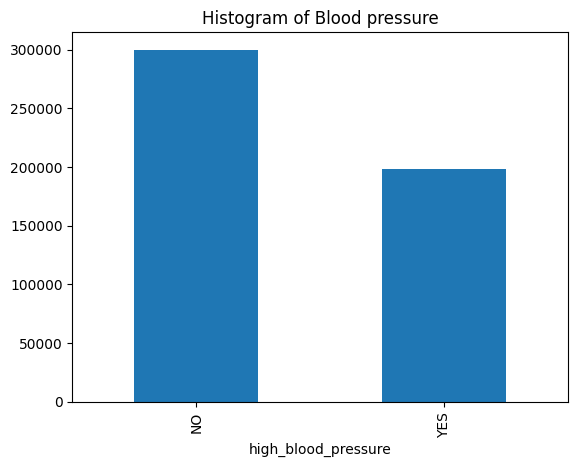

In [18]:
category_counts = dataset[dataset["high_blood_pressure"] != None]['high_blood_pressure'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of Blood pressure')

<Axes: title={'center': 'Histogram of High cholesterol'}, xlabel='high_cholesterol'>

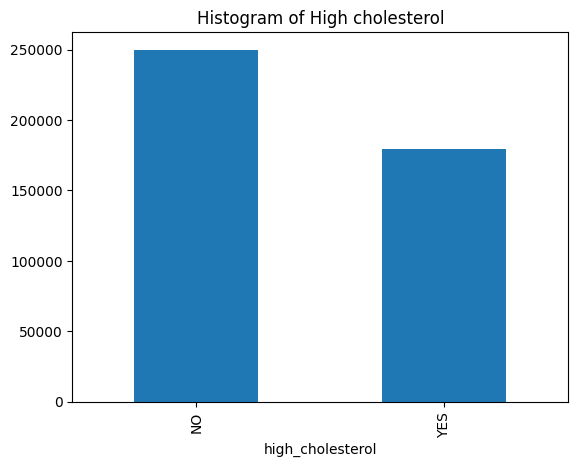

In [32]:
category_counts = dataset[dataset["high_cholesterol"] != None]['high_cholesterol'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of High cholesterol')

<Axes: title={'center': 'Histogram of diabetes'}, xlabel='diabetes'>

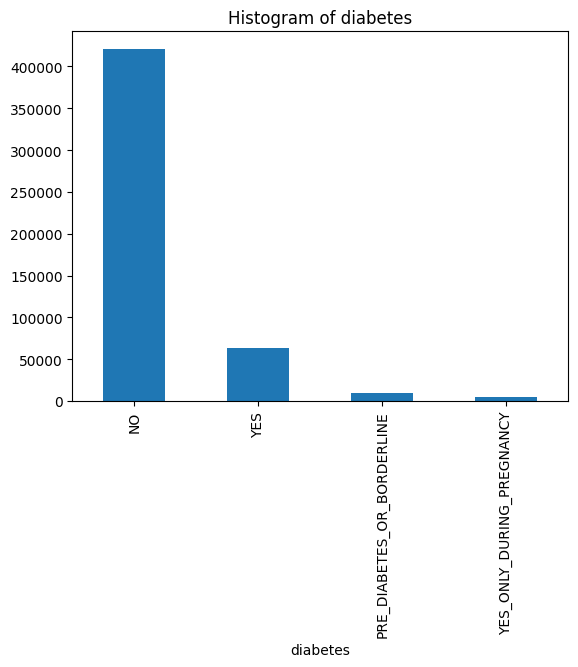

In [22]:
category_counts = dataset[dataset["diabetes"] != None]['diabetes'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of diabetes')

<Axes: title={'center': 'Histogram of cholesterol check'}, xlabel='cholesterol_check'>

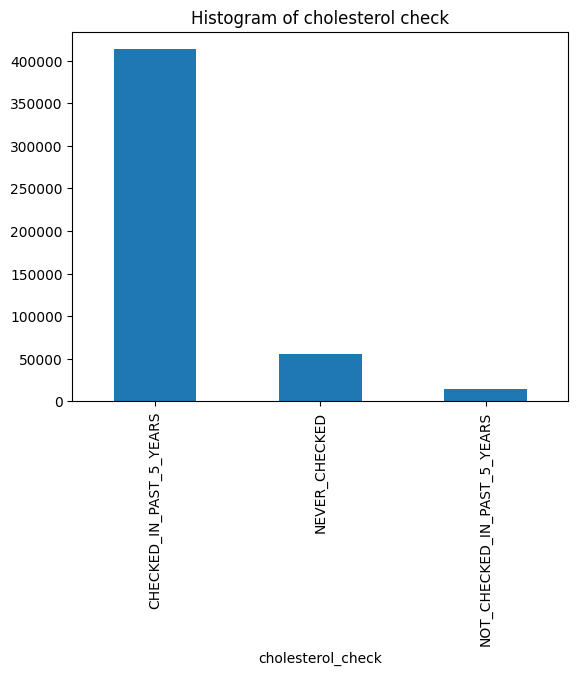

In [28]:
category_counts = dataset[dataset["cholesterol_check"] != None]["cholesterol_check"].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of cholesterol check')


<Axes: title={'center': 'Histogram of people who smoked 100 cigarettes'}, xlabel='smoked_100_cigarettes'>

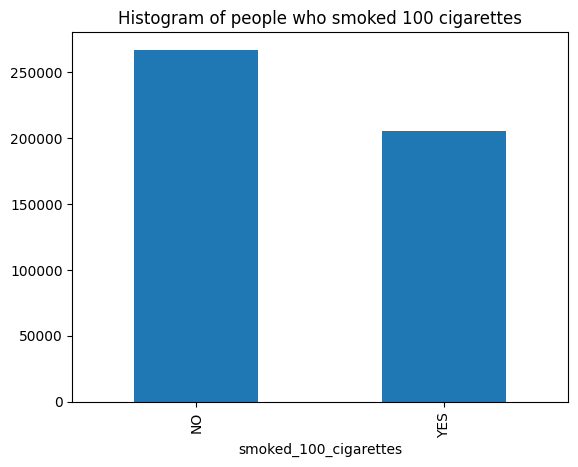

In [25]:
category_counts = dataset[dataset["smoked_100_cigarettes"] != None]['smoked_100_cigarettes'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of people who smoked 100 cigarettes')

<Axes: title={'center': 'Histogram of people who had a stroke'}, xlabel='stroke'>

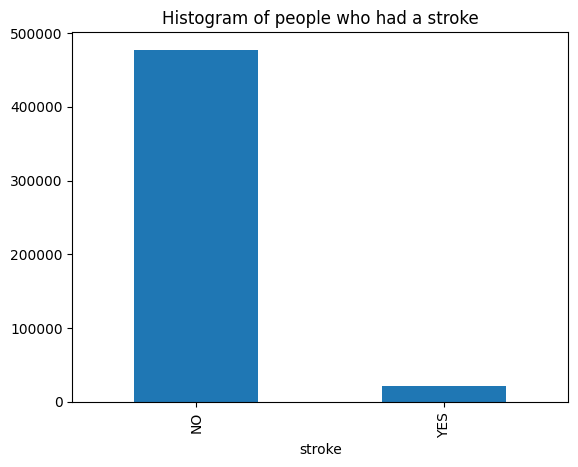

In [33]:
category_counts = dataset[dataset["stroke"] != None]['stroke'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of people who had a stroke')

<Axes: title={'center': 'Histogram of people who suffer form a coronary disease'}, xlabel='coronary_disease'>

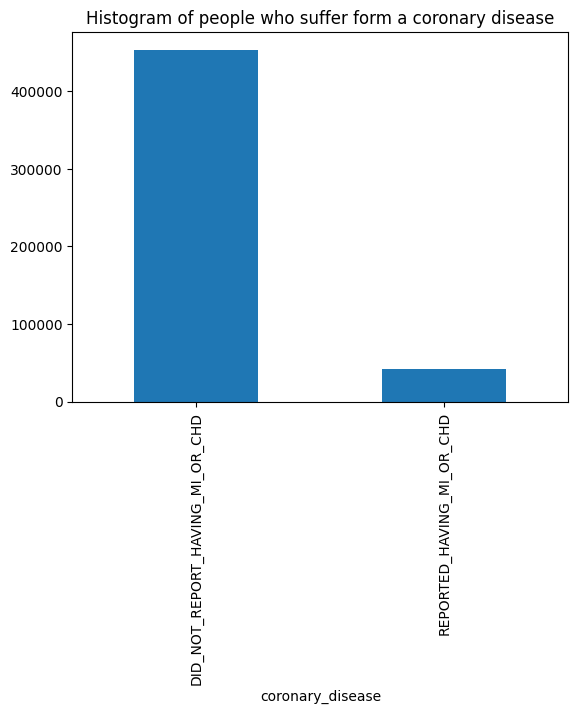

In [36]:
category_counts = dataset[dataset["coronary_disease"] != None]['coronary_disease'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of people who suffer form a coronary disease')

<Axes: title={'center': 'Histogram of people who exercise'}, xlabel='exercise'>

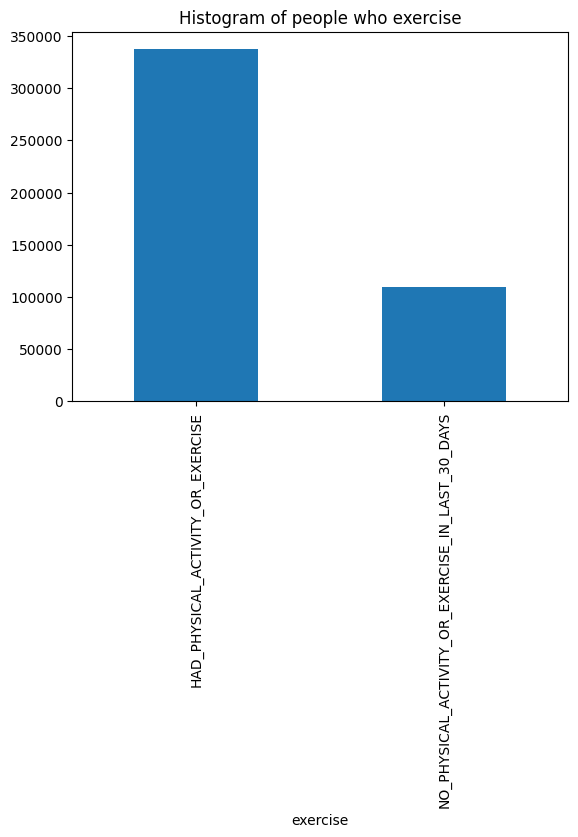

In [37]:
category_counts = dataset[dataset["exercise"] != None]['exercise'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of people who exercise')

<Axes: title={'center': 'Histogram of how much people consume fruit'}, xlabel='consumes_fruit'>

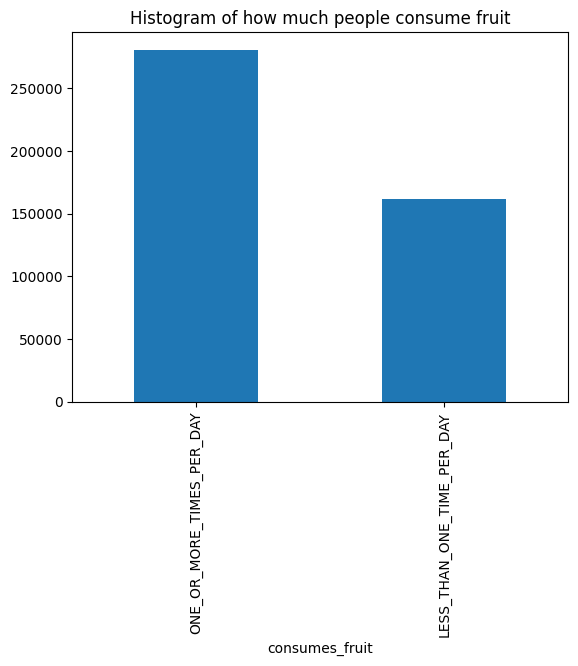

In [39]:
category_counts = dataset[dataset["consumes_fruit"] != None]['consumes_fruit'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of how much people consume fruit')

<Axes: title={'center': 'Histogram of how much people consume vegetable'}, xlabel='consumes_vegetable'>

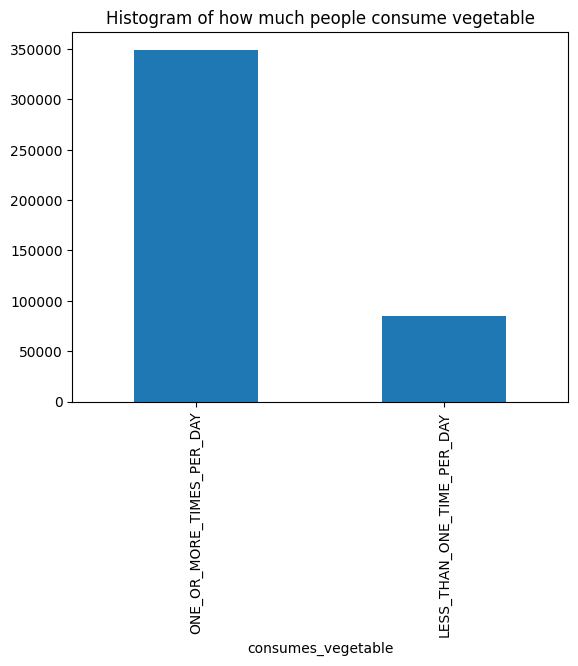

In [40]:
category_counts = dataset[dataset["consumes_vegetable"] != None]['consumes_vegetable'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of how much people consume vegetable')

<Axes: title={'center': 'Histogram of how much people consume vegetable'}, xlabel='insurance'>

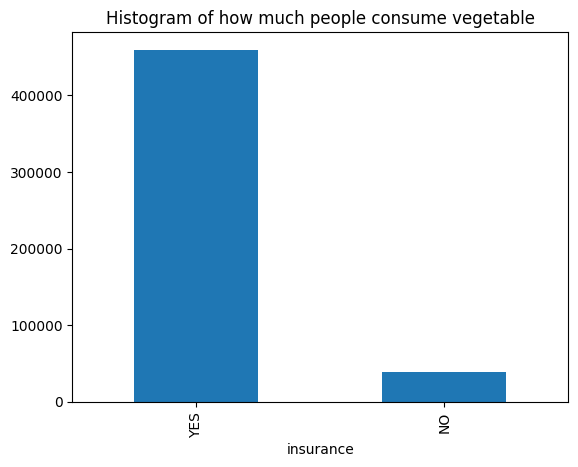

In [41]:
category_counts = dataset[dataset["insurance"] != None]['insurance'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram of how many people have insurance')

<Axes: title={'center': 'Histogram showing how many people could not see doctor because of cost'}, xlabel='no_doctor_money'>

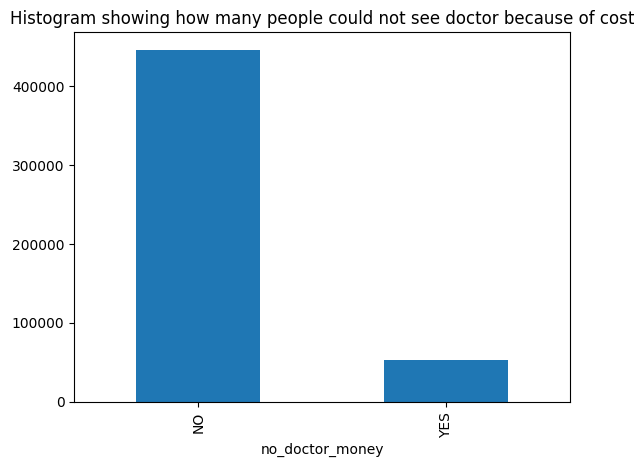

In [43]:
category_counts = dataset[dataset["no_doctor_money"] != None]['no_doctor_money'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram showing how many people could not see doctor because of cost')

<Axes: title={'center': 'Histogram showing peoples health'}, xlabel='health'>

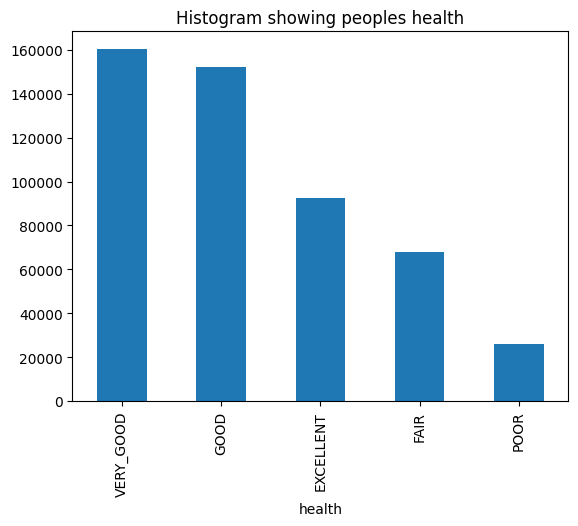

In [48]:
category_counts = dataset[dataset["health"] != None]['health'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram showing peoples health')

<Axes: title={'center': 'Histogram showing peoples difficulty climbing walking stairs'}, xlabel='climb_difficulty'>

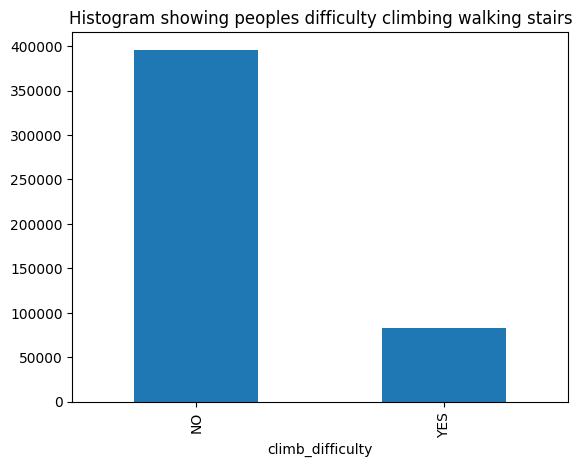

In [49]:
category_counts = dataset[dataset["climb_difficulty"] != None]['climb_difficulty'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram showing peoples difficulty climbing walking stairs')

<Axes: title={'center': 'Histogram showing peoples age'}, xlabel='age_category'>

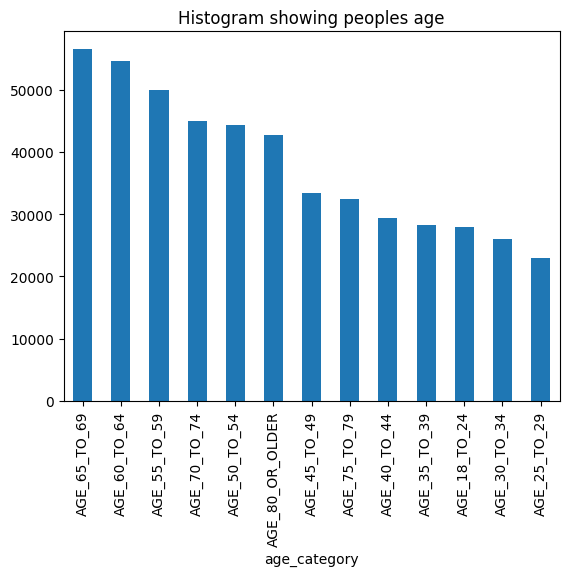

In [54]:
category_counts = dataset[dataset["age_category"] != None]['age_category'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram showing peoples age')

<Axes: title={'center': 'Histogram showing peoples education level'}, xlabel='education_level'>

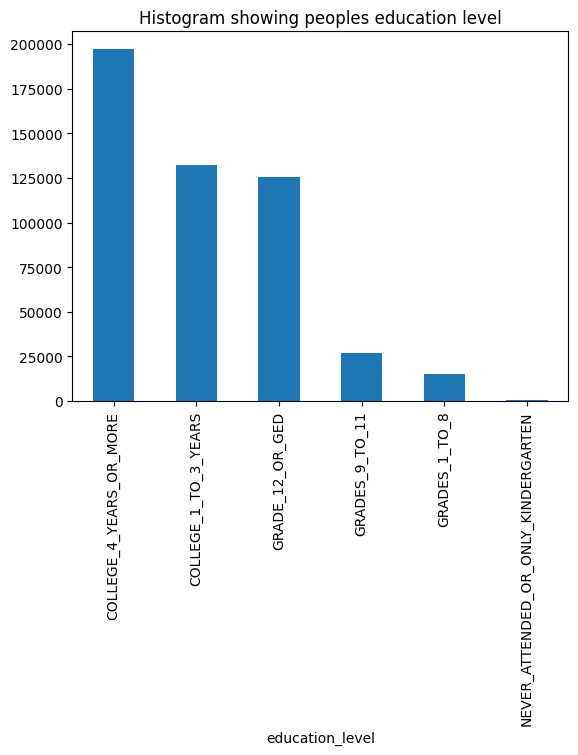

In [57]:
category_counts = dataset[dataset["education_level"] != None]['education_level'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram showing peoples education level')

<Axes: title={'center': 'Histogram showing peoples income'}, xlabel='income'>

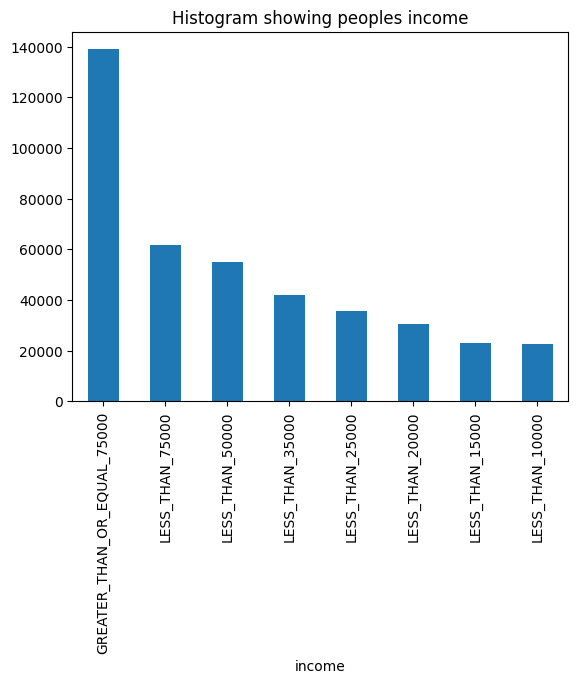

In [58]:
category_counts = dataset[dataset["income"] != None]['income'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar', title='Histogram showing peoples income')

<Axes: title={'center': 'Histogram of insurance and no money for the doctor'}>

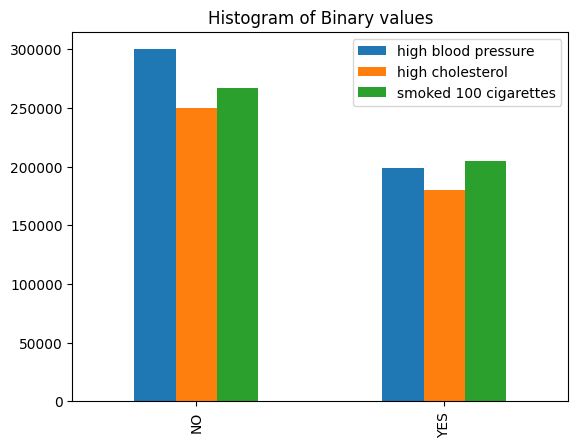

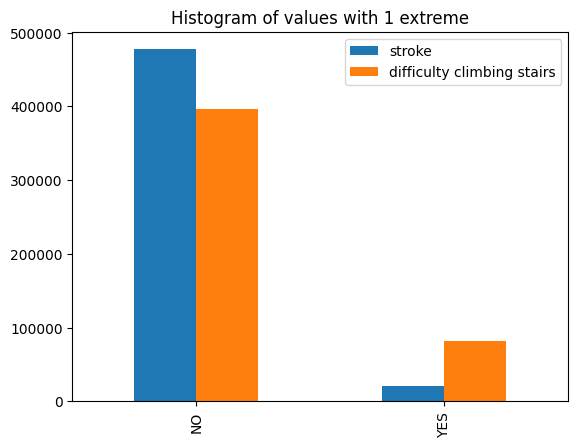

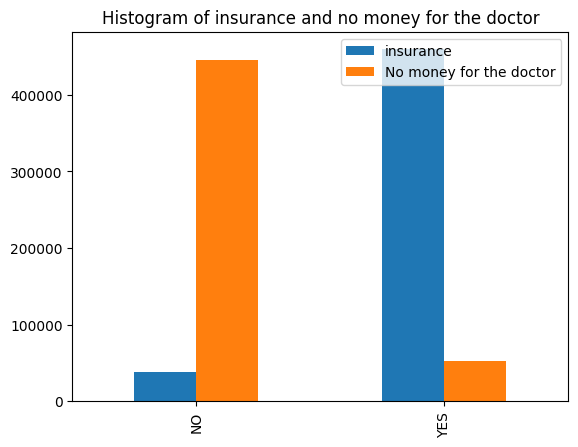

In [53]:
category_counts_1 = dataset[dataset["high_blood_pressure"] != None]['high_blood_pressure'].value_counts()
category_counts_2 = dataset[dataset["high_cholesterol"] != None]['high_cholesterol'].value_counts()
category_counts_3 = dataset[dataset["smoked_100_cigarettes"] != None]['smoked_100_cigarettes'].value_counts()


# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({'high blood pressure': category_counts_1, 'high cholesterol': category_counts_2,
                                'smoked 100 cigarettes': category_counts_3})

# Plot the histogram
combined_counts.plot(kind='bar', title='Histogram of Binary values')

#plot of singular extreme
category_counts_4 = dataset[dataset["stroke"] != None]['stroke'].value_counts()
category_counts_5 = dataset[dataset["climb_difficulty"] != None]['climb_difficulty'].value_counts()

combined_counts = pd.DataFrame({'stroke': category_counts_4,'difficulty climbing stairs': category_counts_5})

combined_counts.plot(kind='bar', title='Histogram of values with 1 extreme')

# insurance vs no money bar plot
category_counts_6 = dataset[dataset["insurance"] != None]['insurance'].value_counts()
category_counts_7 = dataset[dataset["no_doctor_money"] != None]['no_doctor_money'].value_counts()

combined_counts = pd.DataFrame({'insurance': category_counts_6, 'No money for the doctor':category_counts_7})

combined_counts.plot(kind='bar', title='Histogram of insurance and no money for the doctor')